In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn import datasets
import plotly
import plotly.express as px
import plotly.graph_objects as go

Импортируем и проводим фильтрацию по столбцам

In [2]:
churn_df = pd.read_csv('D:/Data Science/data/churn.csv', sep=',')
churn = churn_df.copy()

In [3]:
churn = churn.drop(['RowNumber'], axis = 1)
churn['Loyality'] = churn['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')
# left_clients = churn[churn['Exited'] == 1]
# loyal_clients = churn[churn['Exited'] == 0]

# Задание 9.1.
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

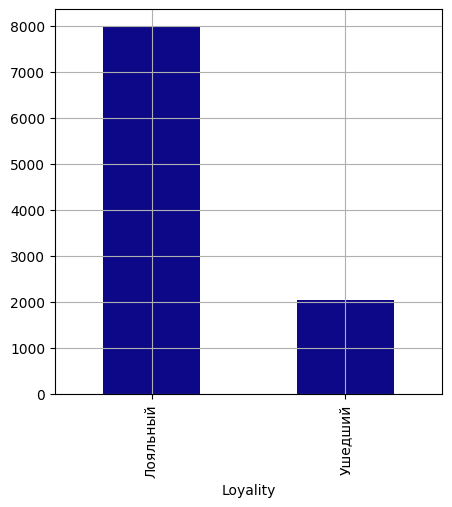

In [5]:
# График №1
loyal_counts = churn['Loyality'].value_counts()
loyal_counts.plot(
    kind = 'bar',
    grid = True,
    figsize = (5, 5),
    colormap = 'plasma'
)
plt.show()

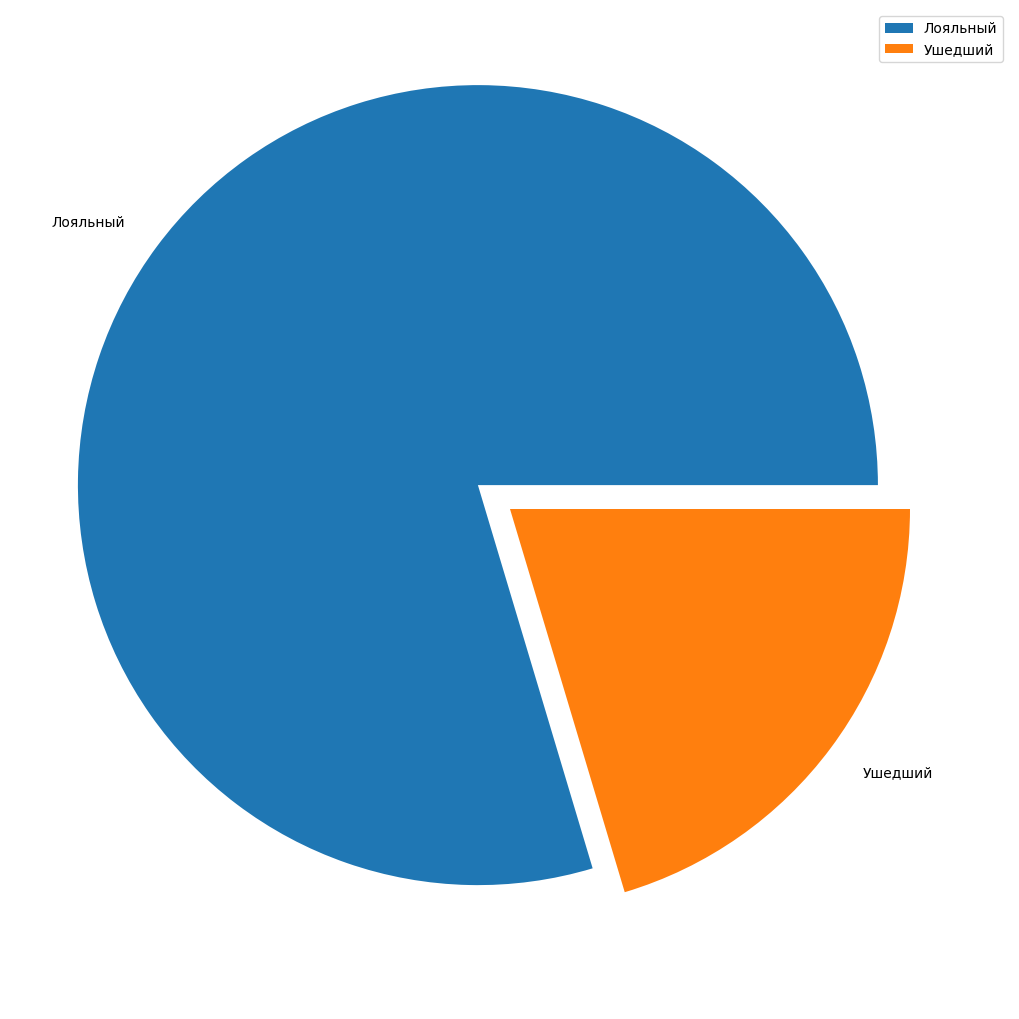

In [6]:
# График №2
loyal_counts = churn['Loyality'].value_counts()
fig = plt.figure(figsize = (10, 10))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyal_counts,
    labels = loyal_counts.index,
    explode = [0.1, 0]
)
axes.legend()
plt.show()

Вывод: Количество ушедших клиентов равняется 1/4 всех клиентов. Количество лояльных клиентов превышает ушедших в 3,91 раза.

# Задание 9.2.
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

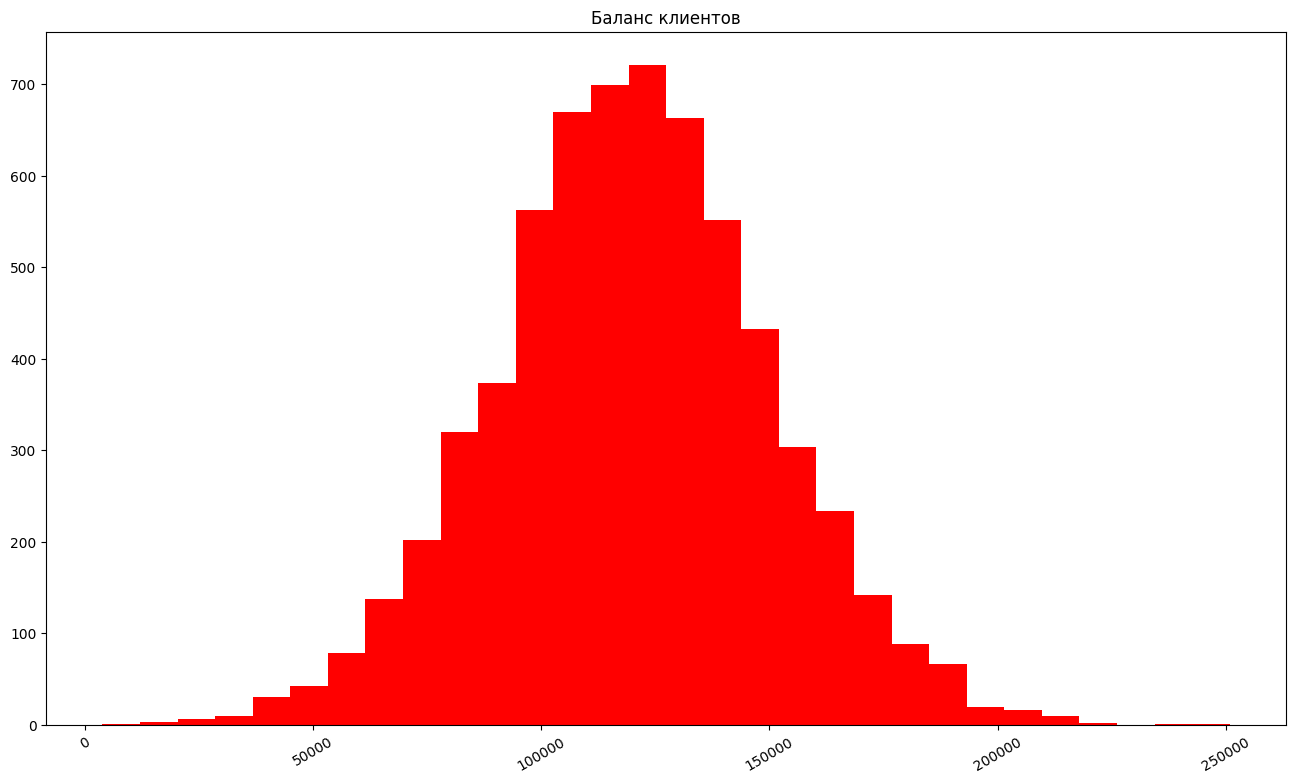

In [7]:
balance_data = churn[churn['Balance'] > 2500]
fig, axes = plt.subplots(nrows=1, figsize=(16, 9))
axes.hist(
    x = balance_data['Balance'], label = ['Количество клиентов'], color = 'red', bins=30
)
axes.set_title('Баланс клиентов')
axes.xaxis.set_tick_params(rotation=30)
plt.show()

Вывод: По данному графику можно сделать вывод, что большая часть клиентов банка имеет на счету больше 2 500 долларов, а также, в среднем, владеет от 90 до 160 тыс. долларов на счету.

# Задание 9.3.
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

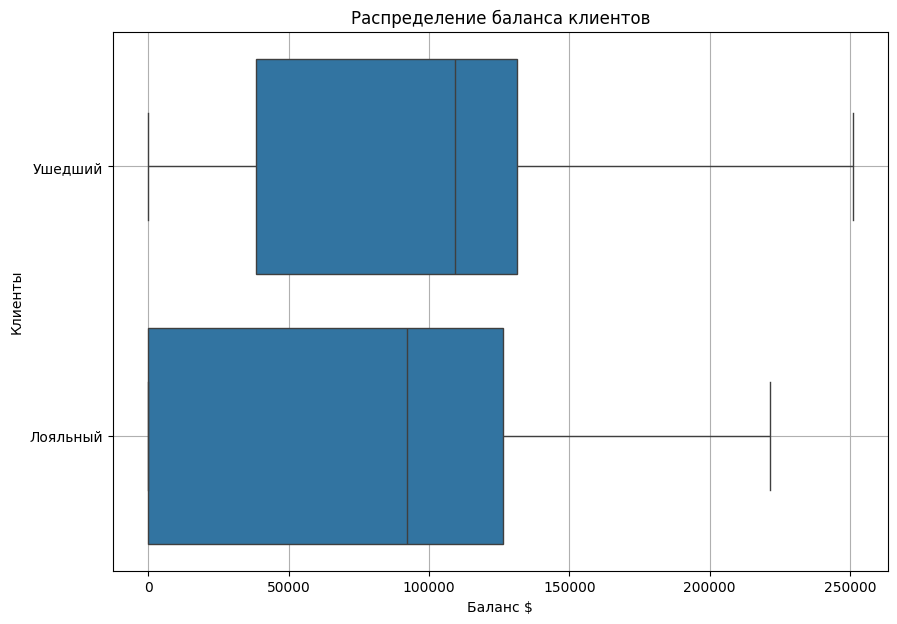

In [8]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn,
    y='Loyality',
    x='Balance',
    orient='h',
)
boxplot.set_xlabel('Баланс $')
boxplot.set_ylabel('Клиенты')
boxplot.set_title('Распределение баланса клиентов')
boxplot.grid()
plt.show()

Вывод: Из выделенной нами клиентской базы можно сделать предположение, что ушедшие клиенты не были удовлетворены политикой сберегательных вкладов и процентных ставок на них, т.к. график показывает высокое значение верхней границы и медианного значения.

# Задание 9.4.
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

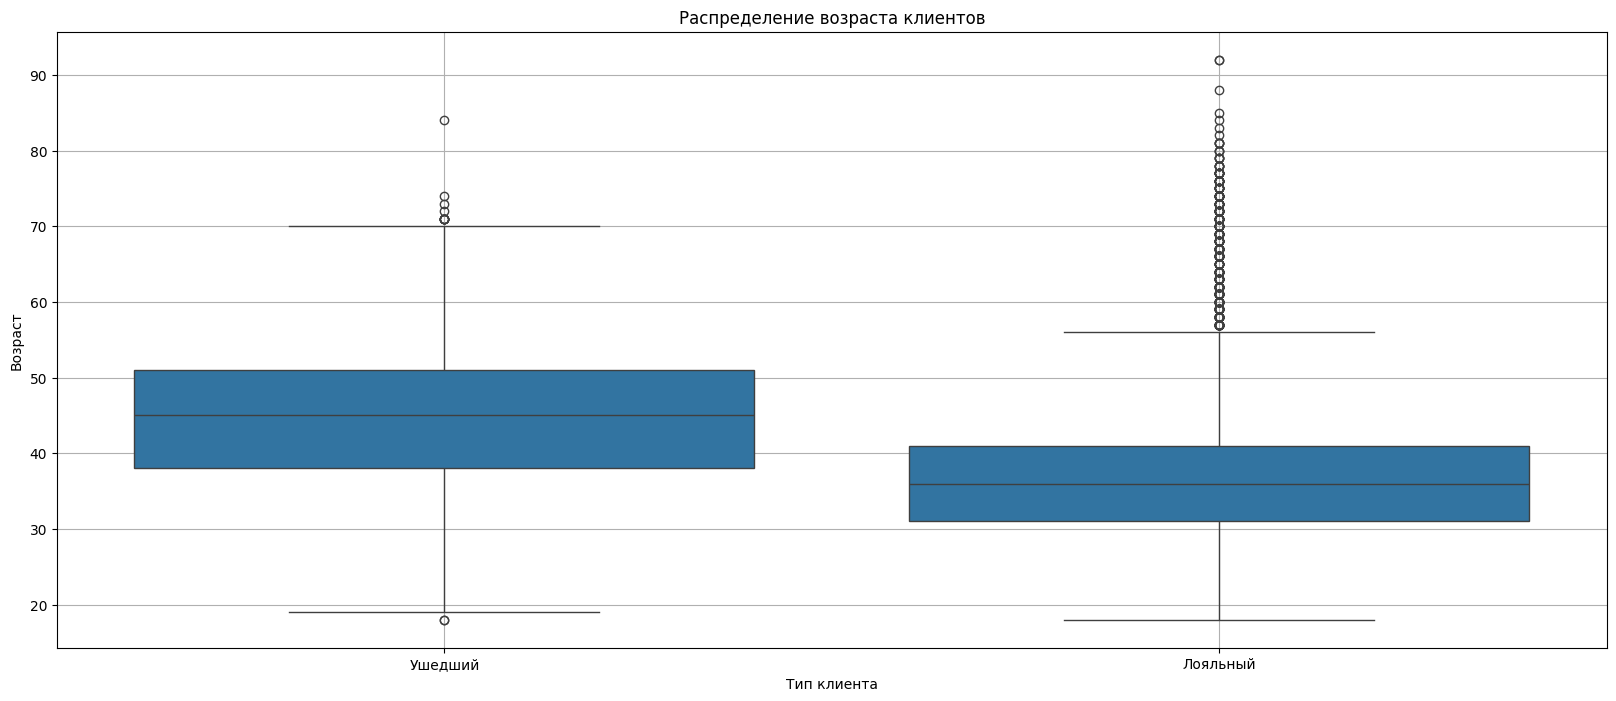

In [9]:
fig = plt.figure(figsize=(20, 8))
boxplot = sns.boxplot(
    data=churn,
    y='Age',
    x='Loyality',
)
boxplot.set_xlabel('Тип клиента')
boxplot.set_ylabel('Возраст')
boxplot.set_title('Распределение возраста клиентов')
boxplot.grid()
plt.show()

Вывод: На построенном графике можно увидеть большое количество потенциальных выбросов у лояльных клиентов. Банк может обратить своё внимание на возрастную категорию от 37 до 52 лет (в "ящике" с ушедшими клиентами) и разобраться в их причине прекращения услуг именно этом возрастном диапазоне.

# Задание 9.5.
Постройте график, который показывает взаимосвязь кредитного рейтинга (CreditScore) клиента и его предполагаемой зарплаты (EstimatedSalary). Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

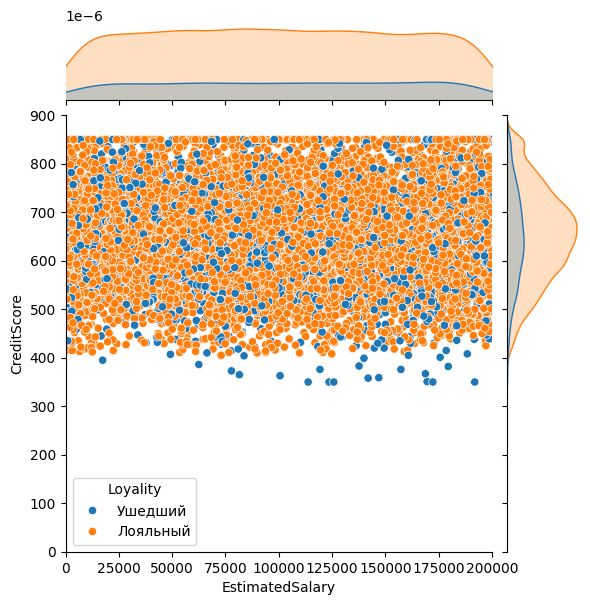

In [10]:
jointplot = sns.jointplot(
    data = churn,
    x = 'EstimatedSalary',
    y = 'CreditScore',
    hue = 'Loyality',
    xlim = (0, 200000),
    ylim = (0, 900),
)
plt.show()

Вывод: На построенном графике можно увидеть, что у лояльных клиентов и у ушедших наблюдается одинаковый кредитный рейтинг и предполагаемая заработная плата. У некоторых ушедших клиентов наблюдался низкий кредитный рейтинг несмотря на их среднюю заработную плату.

# Задание 9.6.
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [11]:
filtered_gender = churn.groupby(
    by = 'Gender',
    as_index = False
    )['Exited'].mean()
fig = px.bar(
    data_frame = filtered_gender,
    x = 'Gender',
    y = 'Exited',
    color = 'Gender',
    title = 'Кто чаще уходит, мужчины или женщины?'
)
fig.show() 

Вывод: На данной столбчатой диаграмме мы видим, что женщины чаще уходят, чем мужчины.

# Задание 9.7.
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

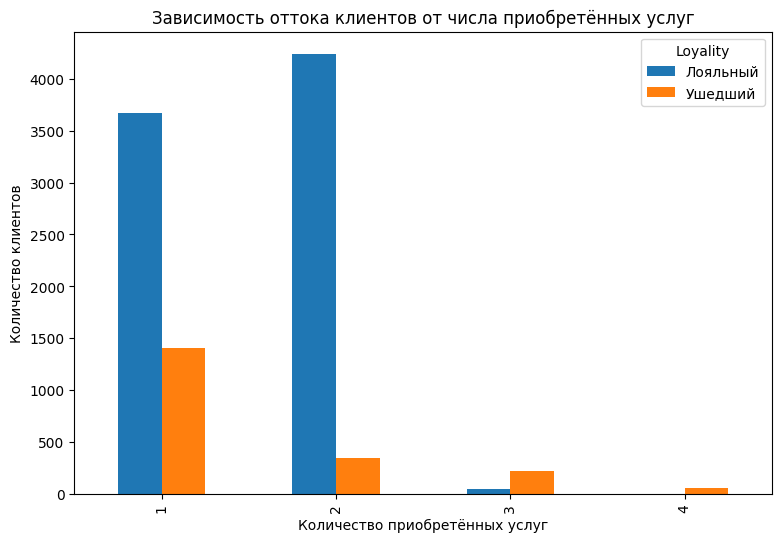

In [98]:
pivot_products = churn.pivot_table(
    'CustomerId',
    index = 'NumOfProducts',
    columns = 'Loyality',
    aggfunc = 'count',
).fillna(0)

fig, axes = plt.subplots(figsize=(9, 6))
pivot_products.plot(kind = 'bar', ax = axes)
axes.set_title('Зависимость оттока клиентов от числа приобретённых услуг')
axes.set_xlabel('Количество приобретённых услуг')
axes.set_ylabel('Количество клиентов')
plt.show()

Вывод: Данная гистограмма показывает, что лояльные клиенты используют в основном 1-2 услуги от банка, когда ушедшие клиенты "набирают" большой пакет услуг и впоследствии уходят. Возможно банку следует подробнее охарактеризовывать услуги, чтобы у пользователей не возникало путаниц.

# Задание 9.8.
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [92]:
pivot_members = churn.pivot_table(
    'CustomerId',
    index = 'IsActiveMember',
    columns = 'Exited',
    aggfunc = 'count'
)
fig = px.bar(
    data_frame = pivot_members,
    width = 1000,
    height = 700,
    color = 'Exited',
    title = 'Наличие статуса активного клиента на отток клиентов',
)

fig.show()

In [94]:
fig = px.pie(churn, values='IsActiveMember', names='Loyality', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

Вывод: 

Гистограмма: По данной диаграмме можно сделать вывод, что статус активного клиента слабо, но влияет на отток клиентов. Доля ушедших клиентов, которые не пользовались услугами банка больше, чем у тех, кто пользовался. Возможно, банку следует пересобрать процесс работы с клиентами, провести исследование по анализу проблем пользователей, улучшить безопасный процесс транзакций, улучшить эффективность контакт-центра банка.

Круговая диаграмма: наличие статуса активного клиента влияет на отток клиентов. Вероятнее всего те люди, которые не пользовались банковскими услугами – стали клиентами не по собственному желанию, а с помощью их привлечения.

# Задание 9.9.
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [41]:
print('Количество стран всего: ', churn['Geography'].nunique()) # Франция, Германия, Испания

pivot_countries = churn.pivot_table(
    values = 'Exited',
    index =  'Geography',
    aggfunc = 'mean'
)
fig = px.choropleth(
    data_frame = pivot_countries,
    locations = pivot_countries.index,
    locationmode = 'country names',
    color = 'Exited',
    range_color = [0, 1], # диапазон цвета
    title = 'Доля ушедших клиентов',
    width = 1000,
    height = 500,
    color_continuous_scale = ['red','green']
)
fig.show()

Количество стран всего:  3


Вывод: В Германии наибольший отток клиентов из банка. Возможно, это связанно с тем, что в Германии выбирают наличный способ в качестве расчета за товары и услуги. Банковские технологии в Германии не очень развиты. Также, у немцев должен быть высоким банковский рейтинг, чтобы клиенту выдавали кредит. 

# Задание 9.10.
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [42]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [63]:
churn['CreditScoreCat'] = churn['CreditScore'].apply(get_credit_score_cat).astype('category') 

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего

In [81]:
pivot_credit = churn.pivot_table(
    values = 'Exited',
    index =  'CreditScoreCat',
    columns = 'Tenure',
)
print(pivot_credit)

Tenure                0         1         2         3         4         5   \
CreditScoreCat                                                               
Excellent       0.275000  0.208333  0.137255  0.168317  0.131868  0.233333   
Fair            0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
Good            0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
Poor            0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
Very_Poor       0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

Tenure                6         7         8         9         10  
CreditScoreCat                                                    
Excellent       0.241379  0.127660  0.196078  0.270833  0.254902  
Fair            0.236364  0.171103  0.209016  0.190045  0.205357  
Good            0.182857  0.191892  0.152355  0.194667  0.197802  
Poor            0.179916  0.151261  0.214575  0.251082  0.169492  
Very_Poor       0.225352  0.206349  0.253521  0.229

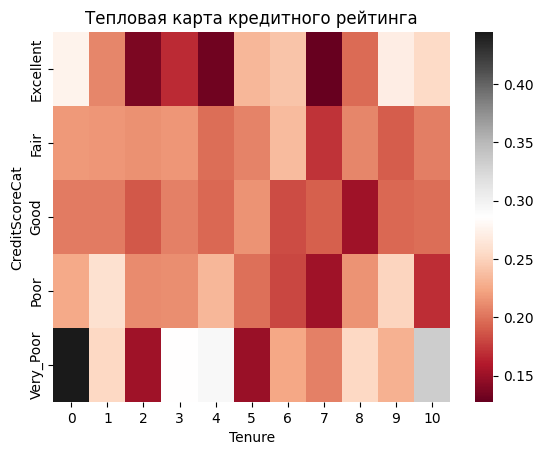

In [82]:
heatmap = sns.heatmap(data=pivot_credit, cmap='RdGy')
heatmap.set_title('Тепловая карта кредитного рейтинга')
plt.show()

Вывод: по тепловой карте можно сказать, что основной отток из банка приходится на тех, у кого кредитный рейтинг 'Very Poor' и пользуется услугами банка до 1 года.